Model for Adjusted net enrollment rate, primary Disparity:
  Mean Squared Error: 33.72723398593379
  R-squared: 0.3276143513642452



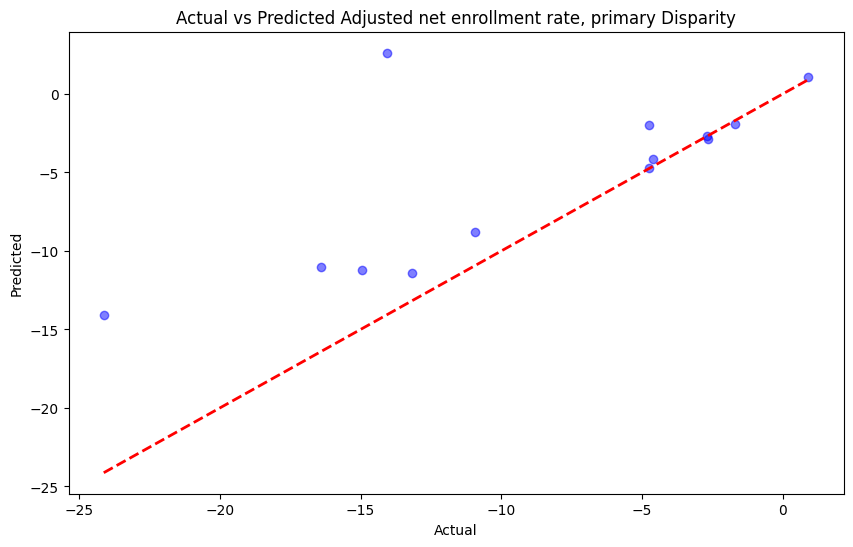

Model for School enrollment, preprimary Disparity:
  Mean Squared Error: 96.13042951481337
  R-squared: 0.21146889163288007



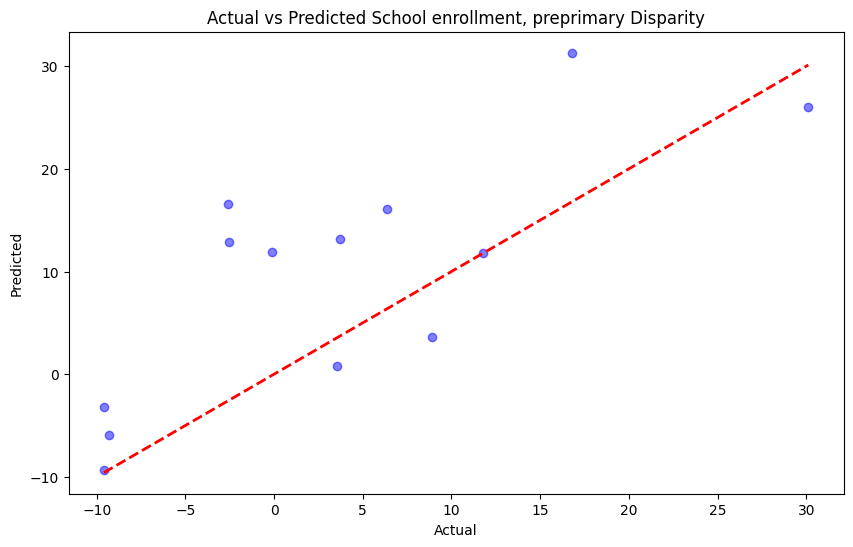

Model for School enrollment, primary (gross) Disparity:
  Mean Squared Error: 15.840577243376126
  R-squared: 0.8238575995660488



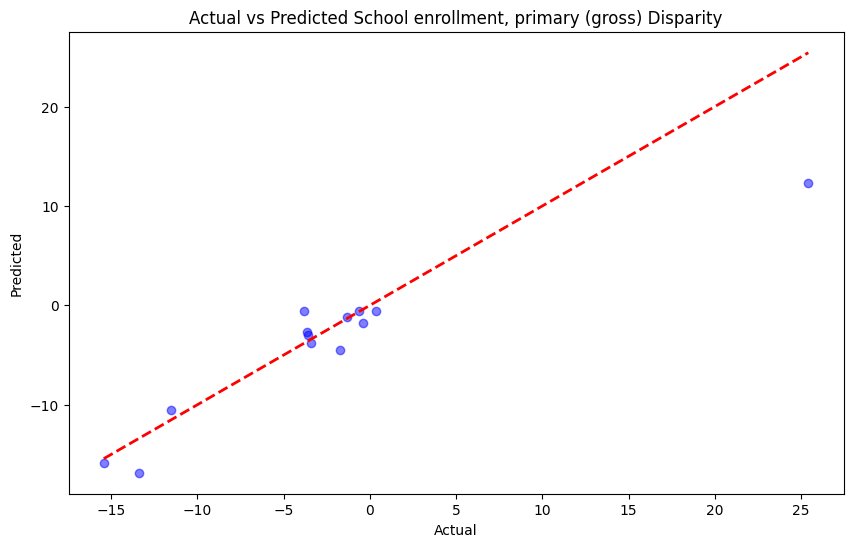

Model for School enrollment, primary (net) Disparity:
  Mean Squared Error: 16.100156056822115
  R-squared: 0.7740586194892837



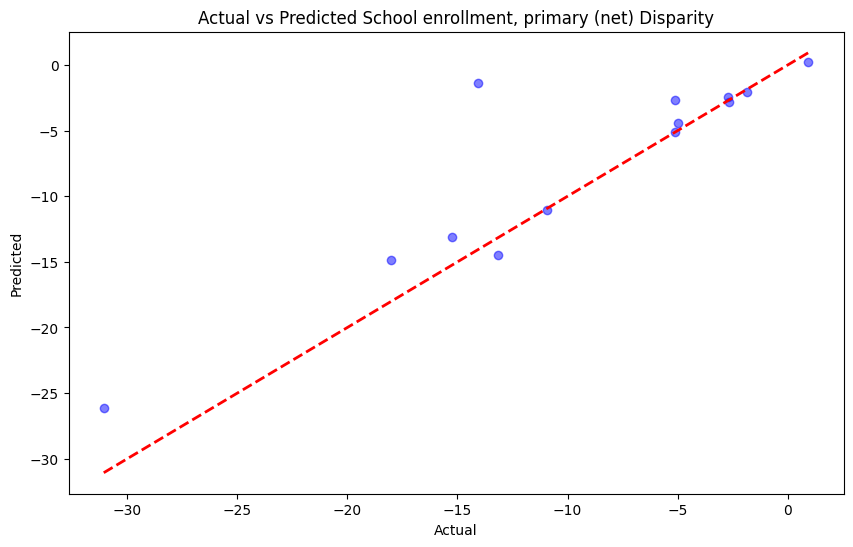

Model for School enrollment, secondary (gross) Disparity:
  Mean Squared Error: 79.27676871766813
  R-squared: 0.8595582645356682



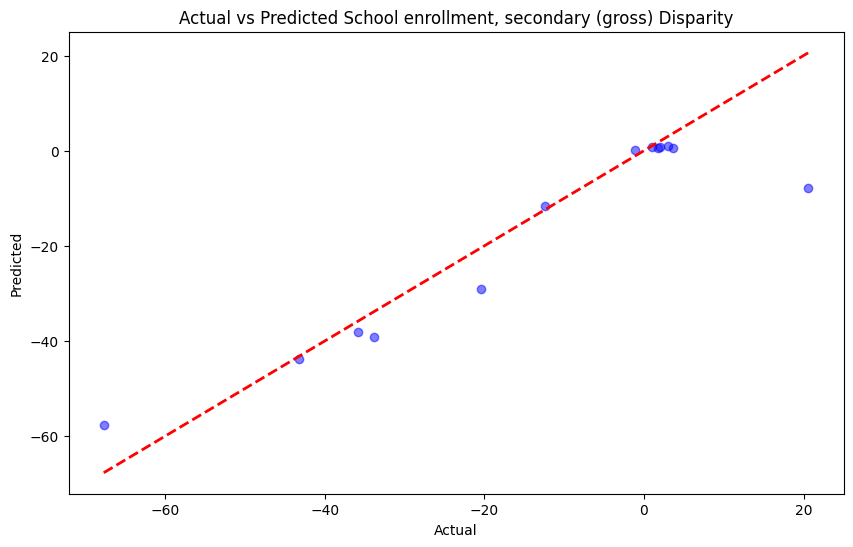

Model for School enrollment, secondary (net) Disparity:
  Mean Squared Error: 19.051507834162248
  R-squared: 0.9363199277520563



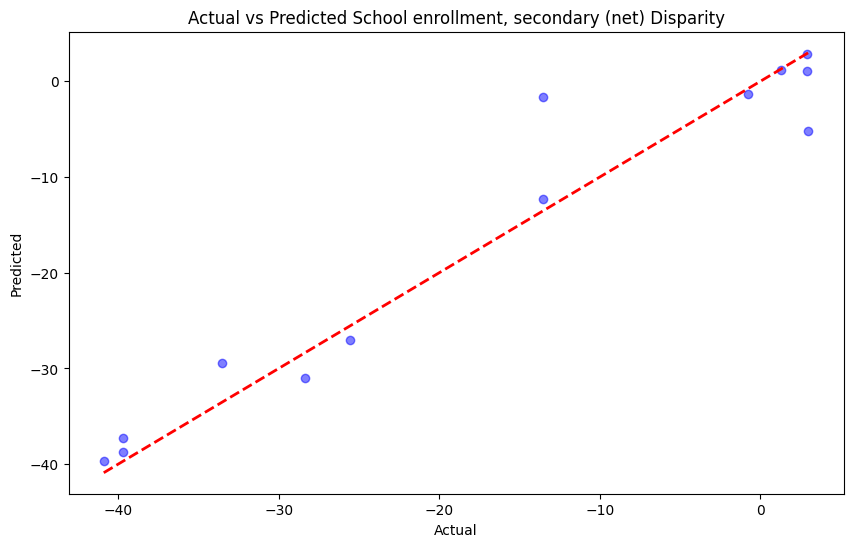

Model for School enrollment, tertiary Disparity:
  Mean Squared Error: 184.9899393768951
  R-squared: 0.8158543965651046



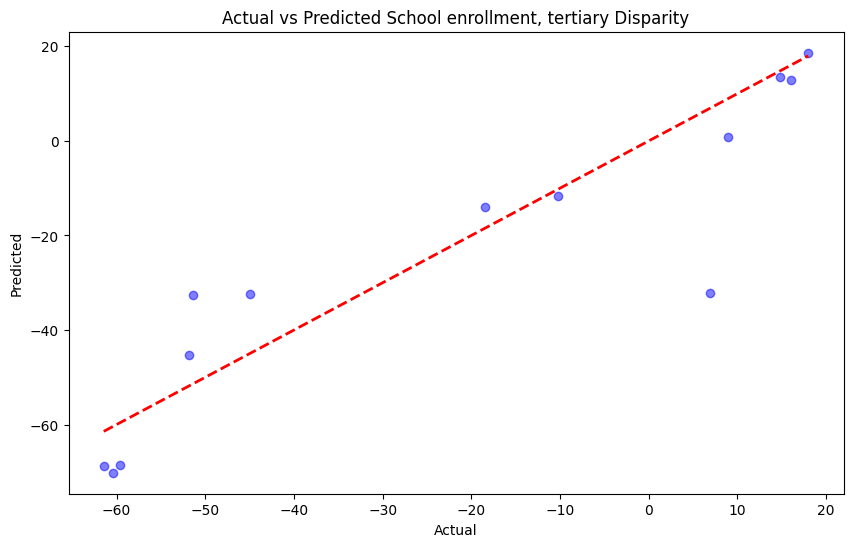

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the cleaned dataset with disparity index
file_path_disparity = 'Cleaned_Gender_IDN_with_Disparity.csv'
data_disparity = pd.read_csv(file_path_disparity)

# Load the original normalized dataset
file_path_original = 'Imputed_Indicators_2.csv'
data_original = pd.read_csv(file_path_original)

# Define features (X) based on columns in the original dataset
features = [
    'Adjusted net enrollment rate, primary, female (% of primary school age children)',
    'Adjusted net enrollment rate, primary, male (% of primary school age children)',
    'School enrollment, preprimary, female (% gross)',
    'School enrollment, preprimary, male (% gross)',
    'School enrollment, primary, female (% gross)',
    'School enrollment, primary, female (% net)',
    'School enrollment, primary, male (% gross)',
    'School enrollment, primary, male (% net)',
    'School enrollment, secondary, female (% gross)',
    'School enrollment, secondary, female (% net)',
    'School enrollment, secondary, male (% gross)',
    'School enrollment, secondary, male (% net)',
    'School enrollment, tertiary, female (% gross)',
    'School enrollment, tertiary, male (% gross)'
]

# Define targets (disparity indices) based on columns in the disparity dataset
targets = [
    'Adjusted net enrollment rate, primary Disparity',
    'School enrollment, preprimary Disparity',
    'School enrollment, primary (gross) Disparity',
    'School enrollment, primary (net) Disparity',
    'School enrollment, secondary (gross) Disparity',
    'School enrollment, secondary (net) Disparity',
    'School enrollment, tertiary Disparity'
]

# Impute missing values in the original dataset
imputer = SimpleImputer(strategy='mean')
data_original_imputed = pd.DataFrame(imputer.fit_transform(data_original), columns=data_original.columns)

# We will create a Random Forest model for each target (disparity index)
models = {}
predictions = {}
for target in targets:
    # Prepare features and target
    X = data_original_imputed[features]
    y = data_disparity[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest regression model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    models[target] = model

    # Make predictions
    y_pred = model.predict(X_test)
    predictions[target] = y_pred

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model for {target}:')
    print(f'  Mean Squared Error: {mse}')
    print(f'  R-squared: {r2}')
    print()

    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted {target}')
    plt.show()

